
<div style="border:1px solid black; padding:20px 20px;text-align: justify;text-justify: inter-word">
    <strong>Solutions Session 4 - Local Navigation<br/> Autumn 2020 <br/> Duration : 4 hours (2 in session + 2 at home)</strong><br/><br/>
    <span style="text-decoration:underline;font-weight:bold;">How to use this notebook?</span><br/>
    This notebook is made of text cells and code cells. The code cells have to be <strong>executed</strong> to see the result of the program. To execute a cell, simply select it and click on the "play" button (<span style="font: bold 12px/30px Arial, serif;">&#9658;</span>) in the tool bar just above the notebook, or type <code>shift + enter</code>. It is important to execute the code cells in their order of appearance in the notebook.<br/>
You can make use of the table of contents to navigate easily between sections.
</div>

<br/>

<div style="justify;text-justify: inter-word">
So that you may familiarise with the notebooks and the basic python syntax, the exercises are provided in notebook form and whenever there are any calculations to be made, we encourage you to do them by code. Also, if you want to take notes, we encourage you to use the markdown or Raw NBConvert cells. 
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Goals" data-toc-modified-id="Learning-Goals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Learning Goals</a></span></li><li><span><a href="#Requirements" data-toc-modified-id="Requirements-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Requirements</a></span></li><li><span><a href="#Proximity-Sensors" data-toc-modified-id="Proximity-Sensors-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Proximity Sensors</a></span><ul class="toc-item"><li><span><a href="#Characterising-the-Proximity-Sensors" data-toc-modified-id="Characterising-the-Proximity-Sensors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Characterising the Proximity Sensors</a></span></li><li><span><a href="#Using-Sensor-Values-and-Displacements-to-Map-the-Environment" data-toc-modified-id="Using-Sensor-Values-and-Displacements-to-Map-the-Environment-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Using Sensor Values and Displacements to Map the Environment</a></span><ul class="toc-item"><li><span><a href="#Creating-a-local-occupancy-grid-based-on-the-individual-sensor-values" data-toc-modified-id="Creating-a-local-occupancy-grid-based-on-the-individual-sensor-values-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Creating a local occupancy grid based on the individual sensor values</a></span></li><li><span><a href="#Creating-the-global-map-provided-the-sensor-values-and-robot-displacements-within-the-map." data-toc-modified-id="Creating-the-global-map-provided-the-sensor-values-and-robot-displacements-within-the-map.-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Creating the global map provided the sensor values and robot displacements within the map.</a></span></li></ul></li></ul></li><li><span><a href="#Local-Navigation-on-Thymio" data-toc-modified-id="Local-Navigation-on-Thymio-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Local Navigation on Thymio</a></span><ul class="toc-item"><li><span><a href="#Moving-Toward-the-Goal" data-toc-modified-id="Moving-Toward-the-Goal-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Moving Toward the Goal</a></span></li><li><span><a href="#Local-Obstacle-Avoidance" data-toc-modified-id="Local-Obstacle-Avoidance-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Local Obstacle Avoidance</a></span></li><li><span><a href="#Potential-Field-Navigation" data-toc-modified-id="Potential-Field-Navigation-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Potential Field Navigation</a></span></li></ul></li></ul></div>

---

# Learning Goals


- Proximity sensor analysis and local navigation implementation on Thymio


- Analysing the proximity sensors


- Creating a local occupancy grid and global map from sensor values and displacements (Jupyter notebooks)


- Implementing local navigation on the Thymio  (ASEBA studio) in real time


# Requirements

- Thymio 

- The gradient printed on an A3 paper


![gradient](images/gradient.png)




# Proximity Sensors

## Characterising the Proximity Sensors

Proximity sensors just measure the presence of objects, and are hard to characterise in that very fuzzy function. Consider here the use of proximity sensors as distance sensors for a very well defined situation (facing a white paper). 


<blockquote>
<span style="color: #2980B9 ;">
    
On the Thymio schematics one can find that the sensor is a ITR9909.   Have a look [here](http://www.mgelectronic.rs/ProductFilesDownload?Id=2470) for the datasheet. 

Thymio has seven horizontal proximity sensors of which five are located in the front and two in the rear as can be seen in the image below.

![Sensors](images/sensors.png)

For this exericse, we used the proximity sensors in the front and white obstacle to measure the distances.

</span>
</blockquote>


***In this context, is it possible to extract the position from the data acquired by the proximity sensor?***


<blockquote>
<span style="color: #2980B9 ;">
    
Yes, it is possible to extract the position from the proximity sensors. 


***Why?***  We can do this since the proximity sensors measure the intensity of the infrared light reflected by an obstacle in front of it. An obstacle close to the sensor will reflect more light compared to an obstacle far away from the sensor. With this one can infer an approximate distance relative to the thymio using proximity sensors.

</span>
</blockquote>

***If yes, define an approximate value of the range, the dynamic range, the update frequency, the precision, the resolution, and the accuracy of this specific distance sensor.***

<blockquote>
<span style="color: #2980B9 ;">
    

In order to measure the sensor values we first load the following code into thymio. The code reads and plots all the horizontal proximity sensors in Aseba Studio software. By placing a white obstacle in front of the sensor one can observe the proximity sensor values in the plot. For more accurate values the \textit{variables} dialog in the Aseba Studio can be used.


    var run=0

    onevent button.forward
        run=1

    onevent button.center
        run=0

    onevent prox
        if  run==1 then
            emit plot_event prox.horizontal
        end



We can construct a table to map sensor values to distance. The table below is based upon real measurements. Measurements were made every 1 cm up until 14 cm. After 14 cm, the sensors no longer detects the objects (value = 0). The second column of the table shows the value of the sensor for each distance. The collected data is used to linearize and obtain the co-efficients of the linearized line to convert sensor values to absolute distance. The linearized equation is,
	
\begin{equation}
  {\rm distance} = -339.47*(sensor\_value) + 5739.9  
\end{equation}
	
	
    
| True Distance [cm] | Sensor Value | Computed Distance [cm] |
|:---------------------------:|:---------------------:|:-------------------------------:|
|              1              |          4996         |           2.191357116           |
|              2              |          5007         |           2.158953663           |
|              3              |          4935         |           2.371048988           |
|              4              |          4554         |            3.49338675           |
|              5              |          4018         |           5.072318614           |
|              6              |          3624         |           6.232951365           |
|              7              |          3292         |           7.210946475           |
|              8              |          2987         |           8.109405839           |
|              9              |          2800         |            8.66026453           |
|              10             |          2580         |           9.308333579           |
|              11             |          2307         |           10.11252835           |
|              12             |          2039         |           10.90199429           |
|              13             |          1575         |           12.26883082           |
|              14             |           0           |                0                |
        

- ***Range*** : 
    
    The range of the sensor is approximately between [3cm,13cm]. Below 3cm one can observe that the value remains constant which indicates a saturation of the sensor measurement. On the other hand above 13cm one can observe that there is no detection of the obstacle anymore i.e. the sensor now reads a zero.


- ***Dynamic Range***
    
    The Dynamic Range is defined as, 
    
    \begin{equation}
        D = 20 \log_{10}(\frac{x_{FS}}{\Delta x})
    \end{equation}

    Where,
    + $x_{FS} = x_{\rm max} - x_{\rm min}$
    
    + $\Delta x$ is the smallest reasonable quantity that can be measured. In the accelerometer, this was the unit after digitalisation, here it is a bit more complicated because we have a very high resolution but a lot of noise. Therefore here we take into account the noise and we consider $\Delta x = std(x)$.
    
    \begin{equation}
        D = 20 \log_{10}(\frac{x_{FS}}{\Delta x}) = 20 \log_{10}(\frac{13-3}{0.1494}) =  36.5129 {\rm dB}
    \end{equation}

- ***Update Frequency*** : 

    Thymio updates the distance sensor at a frequency of 10 $Hz$ and generates the `prox` event after every update.


- ***Precision*** : 
    
    Precision can be defined as,

    \begin{equation}
    {\rm precision} = \frac{\rm range}{\sigma} \text{		or simply $\frac{1}{\sigma}$}
    \end{equation}

    Where $\sigma$ is the standard deviation (SD) of measurements at a fixed distance.

    In order to calculate the SD, an obstacle was fixed at a certain distance (6 cm while the experiment was conducted) and sensor value is recorded. The same procedure is repeated ten times. Using the results SD is calculated.
    
   
| Trial | Sensor Value | Compute Distance [cm] |
|:--------------:|:---------------------:|:------------------------------:|
|        1       |          3657         |           6.135741008          |
|        2       |          3649         |           6.159307155          |
|        3       |          3749         |           5.864730315          |
|        4       |          3732         |           5.914808378          |
|        5       |          3744         |           5.879459157          |
|        6       |          3728         |           5.926591451          |
|        7       |          3635         |           6.200547913          |
|        8       |          3638         |           6.191710608          |
|        9       |          3703         |           6.000235661          |
|       10       |          3767         |           5.811706484          |
|                | SD = 50.7297 |       SD =0.1494      |


\begin{equation}
{\rm precision} = \frac{1}{0.1494} = 6.6934 \text{	$cm^{-1}$}
\end{equation}


- ***Resolution***

    Resolution is the smallest input change that can be detected. In this case resolution would be the change in distance for a unit increment of the sensor value. We compute the resolution as
 		
    \begin{equation}
    {\rm resolution} = \frac{\Delta distance}{\Delta sensor\_value} = \frac{10 - 2}{5007 - 2039} \approx  0.003 ~ \text{cm}
    \end{equation}
        

- ***Accuracy***
    \begin{equation}
 		{\rm accuracy} = 1 - \frac{|m -v |}{v}
 	\end{equation}
    
    Where,
 	+ $m$ : Measured value
 	+ $v$ : True value
    
| Trial | Compute Distance [cm] | Accuracy [\%] |
|:--------------:|:------------------------------:|:----------------------:|
|        1       |           6.135741008          |       0.977376499      |
|        2       |           6.159307155          |       0.973448807      |
|        3       |           5.864730315          |       0.977455052      |
|        4       |           5.914808378          |       0.985801396      |
|        5       |           5.879459157          |       0.979909859      |
|        6       |           5.926591451          |       0.987765242      |
|        7       |           6.200547913          |       0.966575348      |
|        8       |           6.191710608          |       0.968048232      |
|        9       |           6.000235661          |       0.999960723      |
|       10       |           5.811706484          |       0.968617747      |
|                |           SD = 0.14943         |       Avg =  0.9784    |


</span>
</blockquote>

***Is there cross-talk between the sensors? How can you verify this?***

<blockquote>
<span style="color: #2980B9 ;">
    
Yes, there is cross-talk between the proximity sensors. One way of verifying this is by measuring a specific distance by placing an obstacle only in front of one sensor (you can observe if a sensor is active or not by looking at the red LEDs next to them) and repeating the same exercise while multiple sensors are being used. Observing the difference between the two cases can show there exists a cross-talk.

</span>
</blockquote>

## Using Sensor Values and Displacements to Map the Environment

The goal of this exercise is two-fold:


- to implement the local occupancy grid around the Thymio robot based on the sensor readings. 


- provided a set of displacements and sensor readings, estimate 

In [1]:
!pip install numpy matplotlib pandas scipy tqdm

You should consider upgrading via the '/Users/laila-mobots/.virtualenvs/venv/bin/python -m pip install --upgrade pip' command.


### Creating a local occupancy grid based on the individual sensor values

Obstacle avoidance algorithms rely on knowing where the obstacles in the environment are. 
The goal of this exercise is to determine the position of obstacles detected by a virtual Thymio's sensors and place them in a local occupancy grid. 

You will have to start by estimating the distance of the different obstacles in the environment using the proximity sensor measurements that are provided. 

Therefore, you need to convert the sensor values into distances and place them in the grid around the robot. As such, you must take into account the geometry of the robot and the position / orientation of the different sensors. 


------------------------------------------------------------------
------------------------------------------------------------------
First we start by loading some of the standard python libraries and others that we will use in the exercise

In [2]:
import os
import sys
import math
from statistics import mean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

sys.path.insert(0, os.path.join(os.getcwd(), 'src'))

from local_occupancy import sensor_measurements, sensor_distances
from local_occupancy import thymio_coords, sensor_pos_from_center, sensor_angles

%matplotlib inline

For this exercise, we are going to give you a list of : 

- fictional sensor values : `sensor_measurements`

- corresponding distance measurements  : `sensor_distances`


As we are going to be giving you quite a few variables in this exercise, we are giving you a function called **`variable_info`**. This function will print the type, content and elements that can be accessed from the variable


In [3]:
def variable_info(variable):
    """
    Provided a variable, prints the type and content of the variable
    """
    print("This variable is a {}".format(type(variable)))
    if type(variable) == np.ndarray:
        print("\n\nThe shape is {}".format(variable.shape))
    print("\n\nThe data contained in the variable is : ")
    print(variable)
    print("\n\nThe elements that can be accessed in the variable are :\n")
    print(dir(variable))
    
variable_info(np.array([1]))

This variable is a <class 'numpy.ndarray'>


The shape is (1,)


The data contained in the variable is : 
[1]


The elements that can be accessed in the variable are :

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne

Let's start easy and plot the sensor_distances w.r.t the sensor measurements 


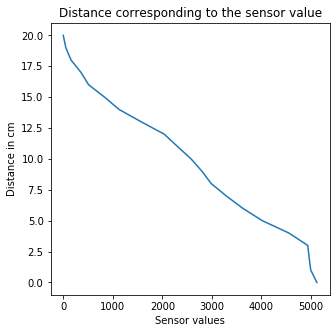

In [4]:
plt.figure(figsize=(5,5))
plt.plot(sensor_measurements, sensor_distances)
plt.ylabel("Distance in cm")
plt.xlabel("Sensor values")
plt.title("Distance corresponding to the sensor value")
plt.show()

Now complete the function below that will give you the distance of the different obstacles in the environment based on the proximity sensor measurements. Have a look at the `interp1d` function that scipy has to provide. 

In [5]:
## Interpolation from sensor values to distances in cm
def sensor_val_to_cm_dist(val):
    """
    Returns the distance corresponding to the sensor value based 
    on the sensor characteristics
    :param val: the sensor value that you want to convert to a distance
    :return: corresponding distance in cm
    """
    if val == 0:
        return np.inf
    
    f = interp1d(sensor_measurements, sensor_distances)
    return np.asscalar(f(val))

# Verifying the interpolation
sensor_val_to_cm_dist(4996)

/Users/laila-mobots/.virtualenvs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  del sys.path[0]


1.0

Once you have verified that the function works, the goal is to create the local occupancy grid that takes into account the geometry of the robot. 

This means, we would like it if you plotted the position of the obstacles in the grid surrounding the robot. For this you need the following information :

- The position of each sensor with respect to the center of the robot. This is provided in the variable `sensor_pos_from_center` : a list containing the coordinates of the 7 sensors proximity sensors starting from the top left to the bottom left in clockwise direction. (0,0) corresponds to the center of the robot

- The orientation of each of the sensors, provided under `sensor_angles` : a list containing the angle that each sensor does with respect to the x axis. 

- The position of the comtour of the robot w.r.t its center, provided under `thymio_coords`, for the visualisation of the occupancy grid: a list of coordinates making up the outline of the Thymio robot. (0,0) corresponds to the center of the robot. 


We have provided the prototype of the function and of the plots below. Please update it to get the results shown in the image below with the sensor values provided in the code cell. 

<img src="Images/part1_solution.png" alt="Drawing" style="width: 500px;"/>



/Users/laila-mobots/.virtualenvs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  del sys.path[0]


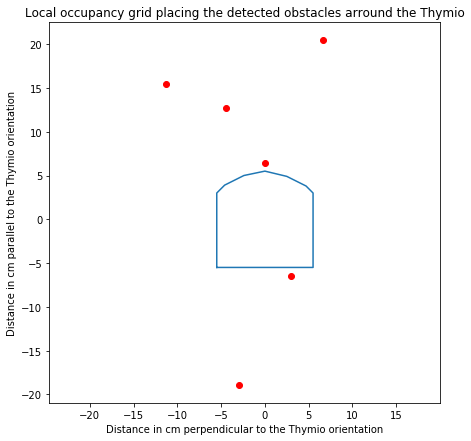

In [6]:
def obstacles_pos_from_sensor_vals(sensor_vals):
    """
    Returns a list containing the position of the obstacles
    w.r.t the center of the Thymio robot. 
    :param sensor_vals: sensor values provided clockwise starting from the top left sensor.
    :return: numpy.array() that contains the position of the different obstacles
    """
    dist_to_sensor = [sensor_val_to_cm_dist(x) for x in sensor_vals]
    dx_from_sensor = [d*math.cos(alpha) for (d, alpha) in zip(dist_to_sensor, sensor_angles)]
    dy_from_sensor = [d*math.sin(alpha) for (d, alpha) in zip(dist_to_sensor, sensor_angles)]
    obstacles_pos = [[x[0]+dx, x[1]+dy] for (x,dx,dy) in zip(sensor_pos_from_center,dx_from_sensor,dy_from_sensor )]
    return np.array(obstacles_pos)

sensor_vals = [1400, 3000, 5000, 500, 0, 5000, 1400]

obstacles_pos = obstacles_pos_from_sensor_vals(sensor_vals)

plt.figure(figsize=(7,7))
plt.title("Local occupancy grid placing the detected obstacles arround the Thymio")
plt.xlabel("Distance in cm perpendicular to the Thymio orientation")
plt.ylabel("Distance in cm parallel to the Thymio orientation")

plt.plot(thymio_coords[:,0], thymio_coords[:,1])
plt.axis("equal")
plt.scatter(obstacles_pos[:,0], obstacles_pos[:,1], marker="o", color="r")

### Creating the global map provided the sensor values and robot displacements within the map.

Now that you are able to construct the local occupancy grid, the goal is to remember where the obstacles are and create a global map. Here, we give you a set of relative displacements (`rel_dpos`) and corresponding sensor values (`map_sensor_vals`). 

The goal is that you use this information to construct the global map. 



Let's start by constructing a function that rotates a set of coordinates by the given angle. You can test it out on the drawing of the thymio's coordinates to make sure it works. 

In [7]:
def rotate(angle, coords):
    """
    Rotates the coordinates of a matrix by the desired angle
    :param angle: angle in radians by which we want to rotate
    :return: numpy.array() that contains rotated coordinates
    """
    R = np.array(((np.cos(angle), -np.sin(angle)),
                  (np.sin(angle),  np.cos(angle))))
    
    return R.dot(coords.transpose()).transpose()
    

Once you have done that, we can move on to constructing a global map from the relative displacements and corresponding sensor values. 

------
------
One way of solving this problem is to do the following (but it is not the only way so if you prefer adopting another solution or changing any portion of the pseudo-code feel free to do so) :

1. Start by defining the initial position of the robot as the origin of the map (i.e the position x,y,theta = 0, 0, 0)


2. Provided the relative displacements (rel_dpos), compute the absolute position of the robot at each step


3. Compute the local occupancy grid from the sensor values at each step. Use the function that you implemented previously


4. Create the global map from the local occupancy grids by rotating and translating the obstacles found. To do so, for each data point you will have to :
    - Rotate the local occupancy grid and coordinates of the outline of the thymio
    - Translate the local occupancy grid and the coordinates of the outline to the position of the Thymio
    - Store the coordinates in a list

5. Plot on a final figure :
    - the trajectory taken by the robot
    - the outline of the robot at each step
    - the position of the obstacles that were seen by the robot in the global frame

-----
-----

Here is the result you should get : 

<img src="Images/map_creation_solution.png" alt="Drawing" style="width: 500px;"/>


/Users/laila-mobots/.virtualenvs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  del sys.path[0]


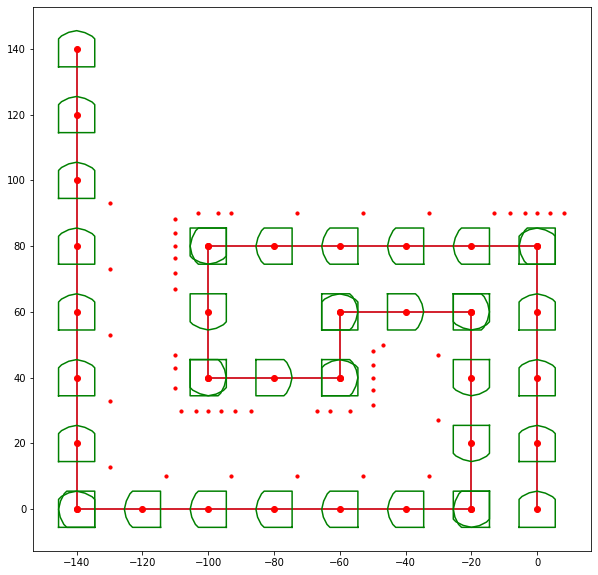

In [8]:
from local_occupancy import map_sensor_vals, rel_dpos

###------------------------------------------------------
# STEP 1
###------------------------------------------------------

# Arbitrarily define the initial robot position as the origin of the map
abs_pos = [[0,0, math.pi/2]] # List of lists that will contain the absolute x,y,theta coordinates of the robot

###------------------------------------------------------
# STEP 2
###------------------------------------------------------

# Provided the relative positions, compute the absolute positions at each step
for (dx,dy,dtheta) in rel_dpos[:]:
    (x,y,theta) = abs_pos[-1][0], abs_pos[-1][1], abs_pos[-1][2]
    d = np.sqrt(dx**2+dy**2)
    new_pos = [x+d*np.cos(theta+dtheta), y+d*np.sin(theta+dtheta), (theta+dtheta)%(2*math.pi)]
    # Appending the computed absolute x, y and theta coordinates to the list
    abs_pos.append(new_pos)

abs_pos = np.array(abs_pos)

###------------------------------------------------------
# STEP 3
###------------------------------------------------------

# Compute the local occupancy grid from the sensor values at each step
local_occupancy_grids = [obstacles_pos_from_sensor_vals(x) for x in map_sensor_vals]

###------------------------------------------------------
# STEP 4
###------------------------------------------------------

# Create the global map based on the data acquired previously
global_map, overall_thymio_coords = [], []

for (local_grid, pos) in zip(local_occupancy_grids, abs_pos):
    
    # Rotate the local occupancy grid
    rotated_grid = rotate(pos[2]-math.pi/2, local_grid)
    rotated_thymio_coords = rotate(pos[2]-math.pi/2, thymio_coords)
    
    # Translate the grid at the position of the Thymio
    obstacles_pos = rotated_grid+np.array([pos[0], pos[1]])
    abs_Thymio_coords = rotated_thymio_coords+np.array([pos[0], pos[1]])
    
    # Store position of the obstacles and Thymio in the global map
    global_map.append(obstacles_pos)
    overall_thymio_coords.append(abs_Thymio_coords)

###------------------------------------------------------
# STEP 5
###------------------------------------------------------

global_map = np.array(np.vstack(global_map))

plt.figure(figsize=(10,10))
plt.plot(abs_pos[:,0], abs_pos[:,1])
plt.scatter(global_map[:,0],global_map[:,1], color="r", s=10)

plt.plot(np.array(abs_pos)[:,0], 
        np.array(abs_pos)[:,1], color="r", marker="o")

for coords in overall_thymio_coords:
    plt.plot(coords[:,0], coords[:,1], color="g")
    
plt.axis("equal");

# Local Navigation on Thymio


Local navigation allows modulating the trajectory to avoid unforeseen, local obstacles. It pushesoften the controller to leave the optimal path to make an avoidance manoeuvre. Once the obstacleis passed, the controller can go back to the optimal path or find a new one. An important issue isto decide when the controller has to start avoiding, and, more difficult, when the obstacle can beconsidered as passed.

We will work with the Thymio placed on a surface that has a gray level gradient. We can consider thatthe darker spot is the goal. This allows, using the ground sensors, to measure the orientation tothe goal.


For this exercise, you should make use of the ``gradient.pdf`` file. 

## Moving Toward the Goal

Implement on Thymio a program that makes it moving toward the goal, as illustrated in the figure below that shows for various positions the path that allows to go to the goal. For this, use the two ground sensors and a simple reactive behaviour.

<br>

![Filename](images/gotogoal.png)

<br>

<blockquote>
<span style="color: #2980B9 ;">
    
Here a simple code allowing to move toward the path:


    var diff #difference between right and left ground sensor

    onevent prox
      diff = prox.ground.delta[1] - prox.ground.delta[0]
      motor.left.target = BASICSPEED - diff*GAIN
      motor.right.target = BASICSPEED + diff*GAIN


Where BASICSPEED = 100 and GAIN = 10.

</span>
</blockquote>


## Local Obstacle Avoidance

Put an obstacle on the path, for instance the box of Thymio, as illustrated in the figure below. The Figure illustrates the paths that allow to go to the goal avoiding the obstacle. Implement a state machine with two states, one moving toward the goal like in the previous behaviour, anothermaking obstacle avoidance. Which condition do you choose to decide to change from going towardthe goal to obstacle avoidance behaviour? Which condition do you choose to decide to change backto moving toward the goal?


<br>

![Filename](images/avoid.png)

<br>


<blockquote>
<span style="color: #2980B9 ;">
    

Here is a possible solution with two distinct navigation behaviors: attraction to the goal with differential wheel velocities which depend on the measured difference of gray level on the ground (**state=0**), or obstacle avoidance using proximity sensors 0 and 4 to accelerate the wheel on the side where an obstacle is detected (**state=1**).

    var speed0 = 100       # nominal speed
    var speedGain = 2      # gain used with ground gradient
    var obstThrL = 10      # low obstacle threshold to switch state 1->0
    var obstThrH = 20      # high obstacle threshold to switch state 0->1
    var obstSpeedGain = 5  # /100 (actual gain: 5/100=0.05)

    var state = 0          # 0=gradient, 1=obstacle avoidance
    var diffDelta          # difference between ground sensors
    var obst[2]            # measurements from left and right prox sensors

    timer.period[0] = 10   # 10ms sampling time

    onevent timer0
      # acquisition from ground sensor for going toward the goal
      diffDelta = prox.ground.delta[1] - prox.ground.delta[0]
      # acquisition from the proximity sensors to detect obstacles
      obst = [prox.horizontal[0], prox.horizontal[4]]
      if state == 0 and (obst[0] > obstThrH or obst[1] > obstThrH) then
        # switch from goal tracking to obst avoidance if obstacle detected
        state = 1
      elseif state == 1 and obst[0] < obstThrL and obst[1] < obstThrL then
        # switch from obst avoidance to goal tracking if obstacle got unseen
        state = 0
      end
      if  state == 0 then
        # goal tracking: turn toward the goal
        motor.left.target = speed0 - speedGain * diffDelta
        motor.right.target = speed0 + speedGain * diffDelta
      else
        # obstacle avoidance: accelerate wheel near obstacle
        motor.left.target = speed0 + obstSpeedGain * (obst[0] / 100)
        motor.right.target = speed0 + obstSpeedGain * (obst[1] / 100)
      end


</span>
</blockquote>


## Potential Field Navigation

Implement the local obstacle avoidance behaviour using the potential field approach.

<blockquote>
<span style="color: #2980B9 ;">
    
The measurements obtained from the ground sensors to get the direction of the goal and from the proximity sensors to avoid the obstacles can be combined into a single 2D vector, which depends on the robot position: this defines a 2D vector field. If the vector field is conservative (integrals between two points are independent of the path), it's the gradient of a potential field.

More precisely, because differentiation is a linear operation, the contribution of each sensor measurement can be considered separately and the results added:

+ The ground sensors measure directly a value proportional to the potential. If the two sensors give the same value, they are on the same level curve and the robot continues forward; if they give different value, potential differentiation (discrete difference) will make the robot turn left or right, toward the goal.


+ Each proximity sensor measures a value larger if an obstacle is close. This gives a vector in the 2D plane in the direction of the sensor, with a contribution backward (mostly for the front sensors) and lateral (mostly for lateral sensors), whose total brings the robot away from the obstacle.


The resultant force is used to modify the nominal speed of the robot (the desired speed for a flat potential).

In the program below, we consider only the final result from the ground and proximity sensors.


    var speed0 = 100      # nominal speed
    var speedGain = 2     # gain used with ground gradient
    var obstSpeedGain[] = [6, 4, -2, -6, -8]	# /100
                          # gains used with front proximity sensors 0..4

    var diffDelta         # difference between ground sensors
    var spLeft            # velocity of left wheel
    var spRight           # velocity of right wheel
    var i                 # for loop

    timer.period[0] = 10  # 10ms sampling time

    onevent timer0
      # acquisition from ground sensor
      diffDelta = prox.ground.delta[1] - prox.ground.delta[0]
      # speed based on nominal velocity and ground (gradient due to goal)
      spLeft = speed0 - speedGain * diffDelta
      spRight = speed0 + speedGain * diffDelta
      # adjustment for obstacles ("gradient" due to obstacles)
      for i in 0:4 do
        spLeft += prox.horizontal[i] * obstSpeedGain[i] / 100
        spRight += prox.horizontal[i] * obstSpeedGain[4 - i] / 100
      end
      # motor control
      motor.left.target = spLeft
      motor.right.target = spRight

</span>
</blockquote>
